# Revolution!

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.utils import shuffle
from tqdm import tqdm
from sklearn.utils import shuffle
import math
import sys
import os

In [4]:
genre_id = 1
def read_genre_year(genre_id, directory = "genre_year"):
    path = "{}/{}.csv".format(directory, genre_id)
    genre_data = pd.read_csv(path)
    return genre_data
    
genre_dataFrame = read_genre_year(genre_id = genre_id)
genre_dataFrame.head()

,Unnamed: 0,danceability,energy,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity_total,number,vector_length
0,1942,-0.277479,-0.178424,-0.251877,-0.064911,-0.115185,0.310613,0.471956,0.007983,-0.076775,-0.039761,0.695331,3.0,3.0,4.935761
1,1944,-0.284414,-0.223463,-0.226213,-0.092517,-0.320678,0.291308,0.487901,-0.020696,-0.067360,-0.035530,0.614387,11.0,3.0,5.523426
2,1945,0.217731,-0.326305,0.421165,0.171967,-0.146248,0.512289,-0.140911,-0.088332,0.081678,-0.107534,-0.556276,4.0,2.0,1.824998
3,1946,-0.302661,-0.342809,-0.400183,-0.145986,-0.443618,0.287167,0.503345,-0.128472,-0.088371,-0.053932,-0.222663,3.0,2.0,3.638826
4,1947,-0.396313,-0.260394,-0.296526,-0.136643,-0.225629,0.369211,0.670811,-0.102041,-0.080467,-0.046162,-0.110909,118.0,8.0,4.251335


In [5]:
number2Genre = \
{0: 'Jazz',
 1: 'Easy Listening',
 2: 'Pop/Rock',
 3: 'Stage & Screen',
 4: 'Vocal',
 5: 'R&B;',
 6: 'Blues',
 7: 'Folk',
 8: 'Religious',
 9: 'International',
 10: 'Country',
 11: 'Latin',
 12: 'Classical',
 13: 'Reggae',
 14: 'Comedy/Spoken',
 15: 'Avant-Garde',
 16: 'Electronic',
 17: "Children's",
 18: 'New Age',
 19: 'Unknown'}

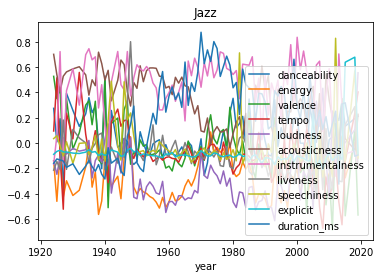

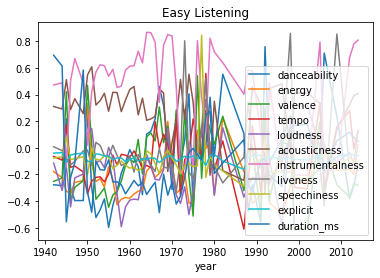

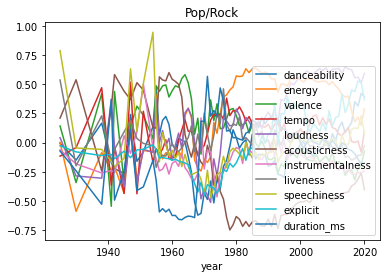

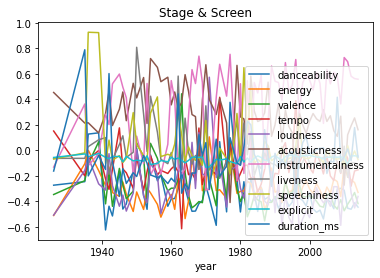

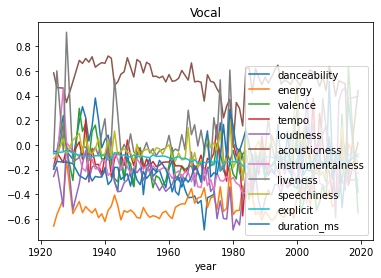

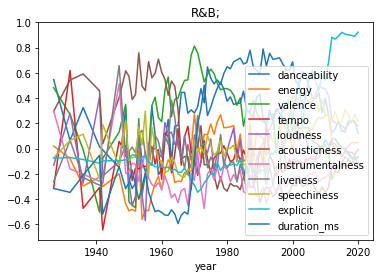

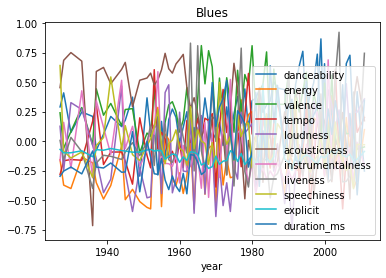

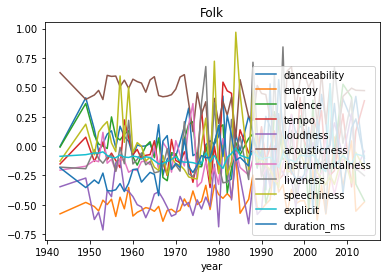

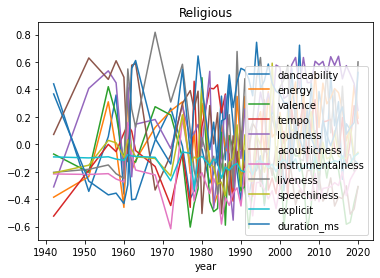

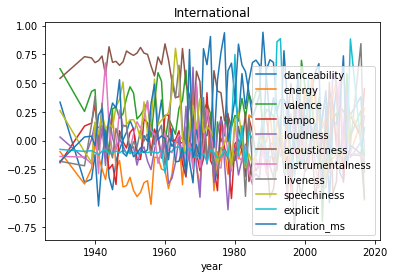

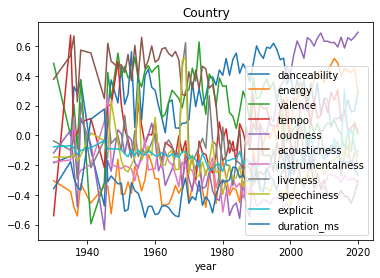

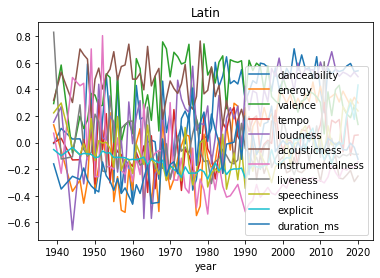

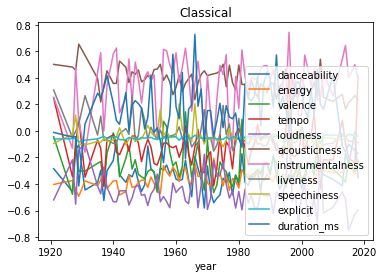

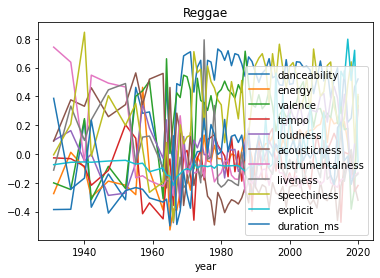

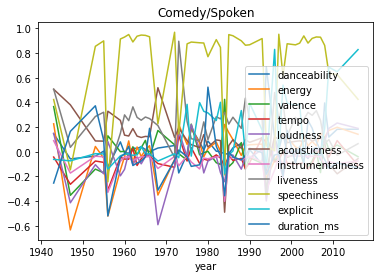

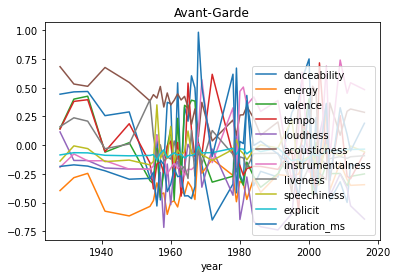

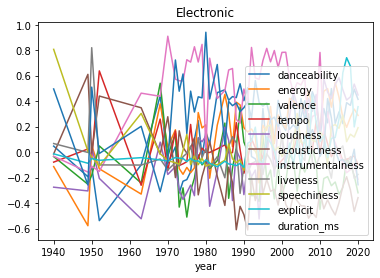

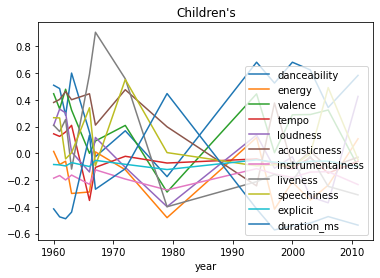

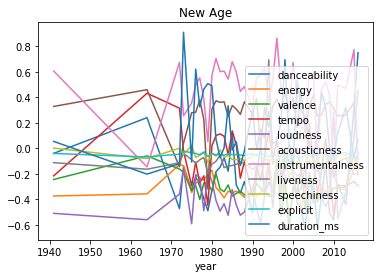

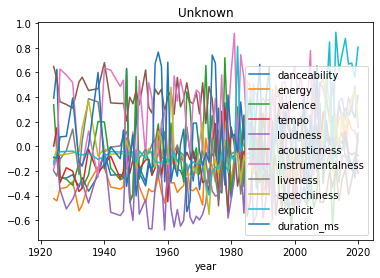

In [6]:
def drawDataFrame_year(genre_dataFrame, id = "-1"):
    columns = genre_dataFrame.columns.values
    columns[0] = "year"
    genre_dataFrame.columns = columns
    x_axis = genre_dataFrame["year"].values
    
    fig,ax = plt.subplots()
    ax.set_xlabel("year")
    
    for i, column in enumerate(columns):
        if not (i in [0,12,13,14]):
            y_axis = genre_dataFrame[column].values
            ax.plot(x_axis,y_axis,label = column)
    plt.legend(loc = "lower right")
    plt.title(number2Genre[id])
    return columns

for genre_id in range(20):
    genre_dataFrame = read_genre_year(genre_id = genre_id)
    drawDataFrame_year(genre_dataFrame,id = genre_id)

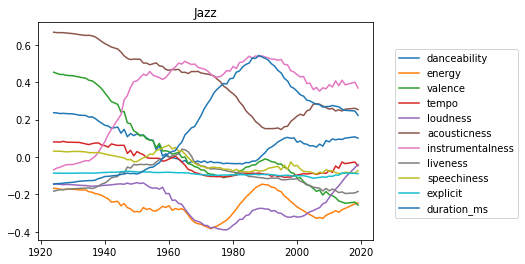

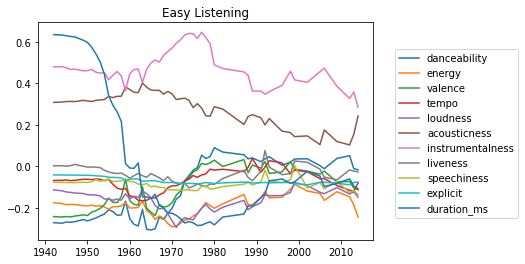

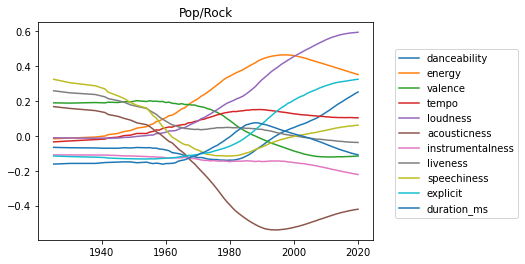

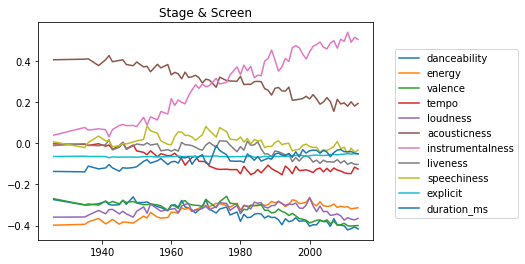

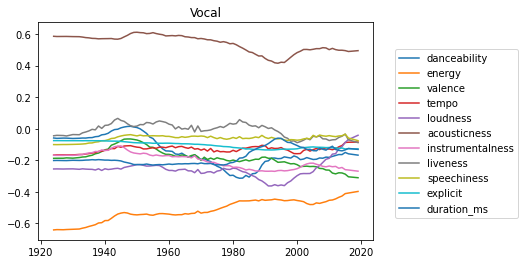

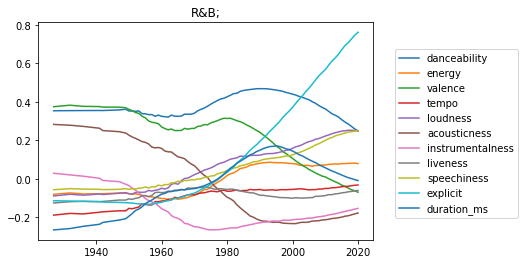

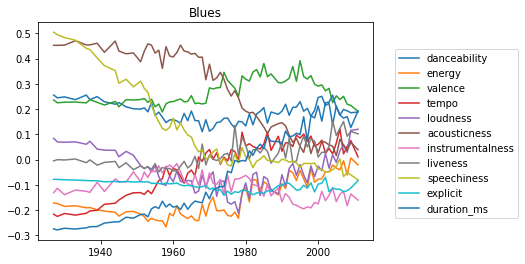

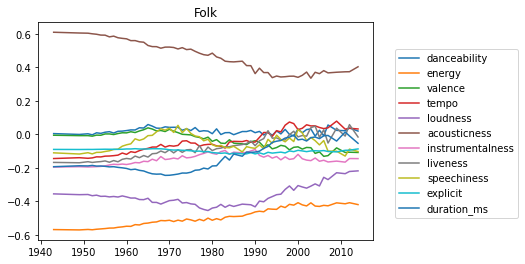

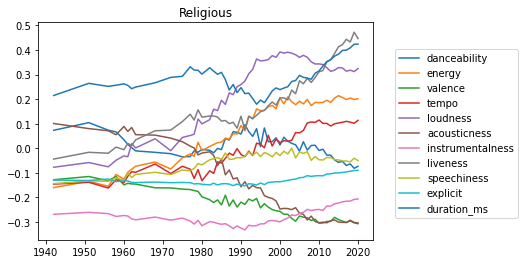

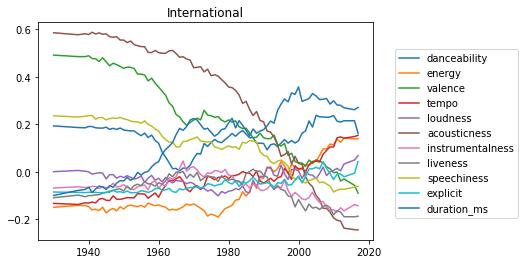

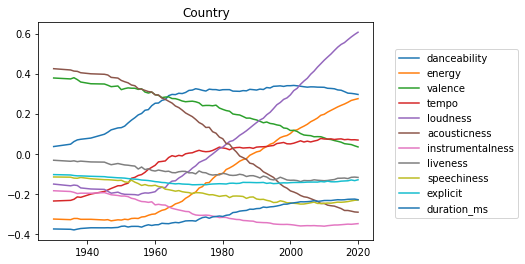

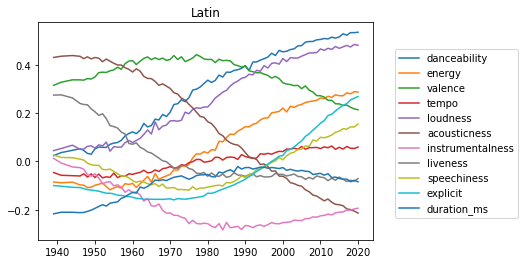

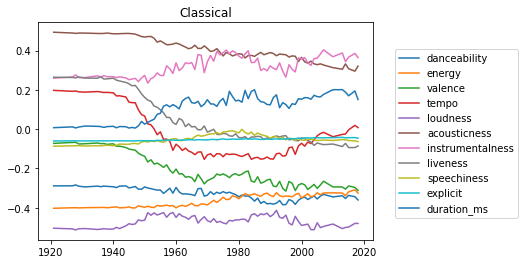

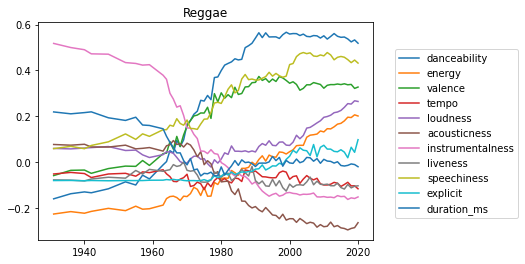

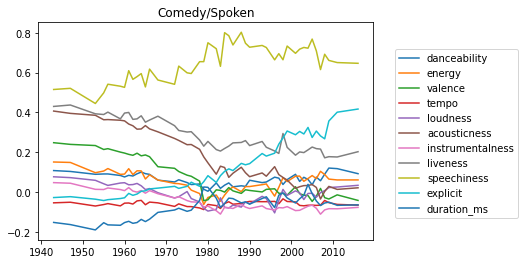

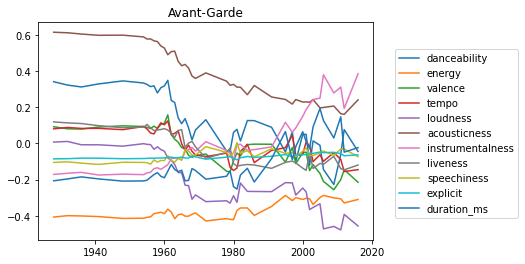

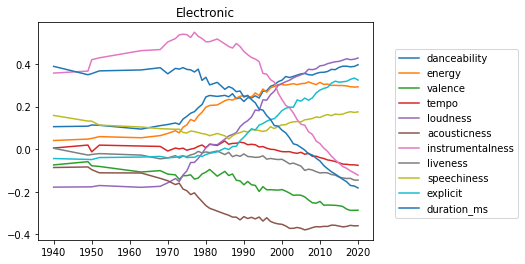

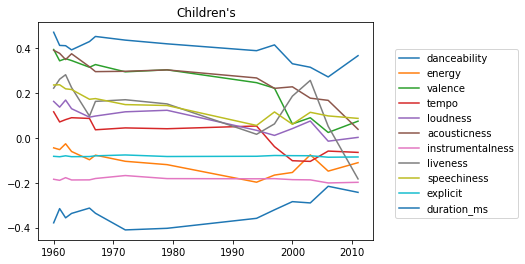

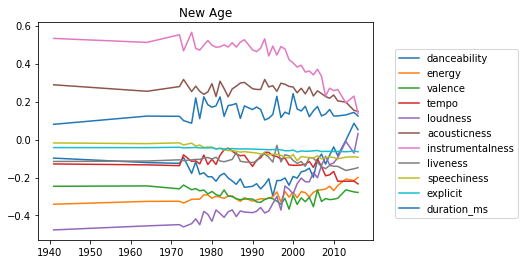

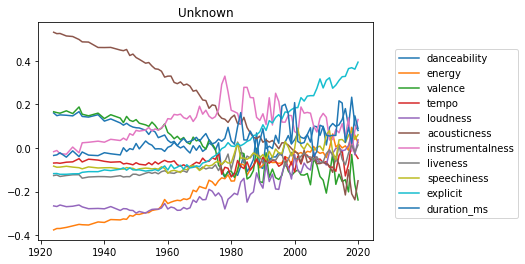

In [7]:
default_weight = np.array([0.05, 0.2, 0.5, 0.2, 0.05])
default_number = -1

def smooth(input_array, weight = default_weight, number = -1,popularity = -1):
    length = len(weight)
    inputLength = len(input_array)
    
    if number == -1:
        number = np.ones(inputLength)
    if popularity == -1:
        popularity = np.ones(inputLength)
        
    paddingL = length//2
    paddingR = length//2 - (length + 1) % 2
    
    input_array = np.hstack([np.ones(paddingL)* input_array[0], input_array, np.ones(paddingR) * input_array[-1]] )
    number      = np.hstack([np.ones(paddingL)* number[0]     , number     , np.ones(paddingR) * number[-1]]      )
    
    output_list = []
    for i in range(inputLength):
        cov = (input_array[i:i+length] * weight * number[i:i+length] / np.sum(number[i:i+length]*weight)).sum()
        output_list.append(cov)
    
    return np.array(output_list)
    
def drawDataFrame_year(genre_dataFrame, id = "-1"):
    columns = genre_dataFrame.columns.values
    columns[0] = "year"
    genre_dataFrame.columns = columns
    x_axis = genre_dataFrame["year"].values
    
    fig,ax = plt.subplots()
#     ax.set_xlabel("year")
    
    for i, column in enumerate(columns):
        if not (i in [0,12,13,14]):
            y_axis = smooth(genre_dataFrame[column].values, genre_dataFrame["number"])
            ax.plot(x_axis,y_axis,label = column)
    plt.legend(bbox_to_anchor=(1.05,0.9))
    plt.title(number2Genre[id])
    
#     print(len(genre_dataFrame["number"]))
#     print(len(genre_dataFrame[column].values))
    return columns


# smooth([1,1,1,1,1],number = [1,2,3,4,5])
# smooth(np.ones(5))

for genre_id in range(20):
    genre_dhttp://localhost:8888/notebooks/Desktop/revolution/revolution_analysis.ipynb#ataFrame = read_genre_year(genre_id = genre_id)
    drawDataFrame_year(genre_dataFrame,id = genre_id)

# 先对数据进行处理，一方面进行平滑处理，另一方面对数据空缺的位置进行差值处理

In [102]:
def read_genre_year(genre_id, directory = "genre_year"):
    path = "{}/{}.csv".format(directory, genre_id)
    genre_data = pd.read_csv(path)
    return genre_data

genre_dataFrame = read_genre_year(genre_id = 0)
genre_dataFrame.loc[:6]


,Unnamed: 0,danceability,energy,valence,tempo,loudness,acousticness,instrumentalness,liveness,speechiness,explicit,duration_ms,popularity_total,number,vector_length
0,1924,0.274291,-0.140369,0.526759,0.095394,-0.141181,0.700509,-0.166266,-0.213435,0.035551,-0.088581,-0.159787,1.0,1.0,2.215473
1,1925,0.009522,-0.459682,0.350788,0.515252,-0.246597,0.539703,0.059316,-0.145273,0.058305,-0.065503,-0.125150,28.0,1.0,2.996063
2,1926,0.191932,-0.071901,0.431580,-0.087648,-0.110910,0.407340,0.722032,-0.207299,-0.023784,-0.056332,-0.133339,7.0,1.0,3.483775
3,1927,-0.390288,-0.425132,-0.139752,-0.521787,0.042881,0.527927,-0.162042,0.182174,-0.101707,-0.069598,-0.141301,5.0,2.0,2.819763
4,1928,0.392422,-0.297206,0.351535,0.235996,-0.086908,0.561719,0.413208,-0.207138,0.010630,-0.070744,-0.191198,62.0,4.0,2.774077
5,1930,0.258623,-0.413513,-0.047685,0.033446,-0.041803,0.585500,0.586834,0.107468,-0.159126,-0.079029,-0.163345,3.0,2.0,2.483263
6,1932,0.131948,-0.371951,0.081785,0.557736,-0.063503,0.602572,0.299530,0.040237,-0.002018,-0.082093,-0.247542,49.0,9.0,2.390564


In [113]:
def find_none_zero(array, pos):
    pass
def linear_fit(start_vec, start_pos, end_vec,end_pos, insert_pos):
    return (start_vec * (end_pos - insert_pos)+ end_vec * (insert_pos - start_pos)) / (end_pos - start_pos)


for genre_id in tqdm(range(20),):
    columns = genre_dataFrame.columns.values
    columns[0] = "year"
    genre_dataFrame.columns = columns
    
    x_axis = genre_dataFrame["year"].values    
    for i, column in enumerate(columns):
        if not (i in [0,12,13,14]):
            y_axis = genre_dataFrame[column].values
            y_axis_smooth = smooth(genre_dataFrame[column].values, genre_dataFrame["number"])
            genre_dataFrame[column] = y_axis_smooth
        
        marker = -1
        new_frame = pd.DataFrame(columns = genre_dataFrame.columns.values) 
        for year in range(1920, 2021,1):
            max_year = genre_dataFrame.loc[:,"year"].values.max()
            if year in genre_dataFrame["year"].values:
                new_frame.loc[len(new_frame),:] = genre_dataFrame[genre_dataFrame["year"] == year].values
                marker = genre_dataFrame[genre_dataFrame["year"] == year].index.values
            else:
                if marker == -1 or year > max_year:
                    pass
                else:
                     new_frame.loc[len(new_frame),:] = linear_fit(genre_dataFrame.loc[marker,:].values, 
                                                                  genre_dataFrame.loc[marker,"year"].values[0],
                                                                  genre_dataFrame.loc[marker+1,:].values, 
                                                                  genre_dataFrame.loc[marker+1,"year"].values[0], year)
    new_frame.to_csv(f"genre_year_smooth/{genre_id}.csv")
    


# marker = 1928
# # linear_fit(genre_dataFrame.loc[marker,:].values, marker, 
# #         genre_dataFrame.loc[marker+1,:].values, 
# #         genre_dataFrame.loc[marker+1,"year"].values[0], year)
# genre_dataFrame.loc[marker,:].values

100%|██████████████████████████████████████████████████████████████████████████████████| 20/20 [00:34<00:00,  1.71s/it]


# 设计一个能够读出一个genre当中所有artist的作品的subFrame的函数

In [ ]:
# 首先整理一个流派当中所有artist的id，这个之前应该已经有完成

In [71]:
test = pd.DataFrame({'key1':['a','a','b','b','a'],'key2':['one','two','one','two','one'],'data1':np.random.randn(5),'data2':np.random.randn(5)})
test

,key1,key2,data1,data2
0,a,one,1.454614,-1.538334
1,a,two,-0.072040,0.219518
2,b,one,-0.948207,-1.361151
3,b,two,-0.060354,-1.733759
4,a,one,-0.581597,0.052725


In [80]:
test[test["key1"] == "b"].index.values

array([2, 3], dtype=int64)

In [88]:
test.loc[len(test),:] = [1,2,3,4]
# test["key1" == "b"]
test

,key1,key2,data1,data2
0,a,one,1.454614,-1.538334
1,a,two,-0.072040,0.219518
2,b,one,-0.948207,-1.361151
3,b,two,-0.060354,-1.733759
4,a,one,-0.581597,0.052725
5,1,2,3.000000,4.000000


In [54]:
for i ,j in enumerate(test.loc[:,"key1"]):
    print(j)

a
a
b
b
a
1
1


In [89]:
print(test.loc[5,:].values.max())

4.0
